# Useful model instance properties and methods
The focus of this chapter is to introduce some properties and methods of the model instance.

First a model and data is loaded, then a scenario is run. Then we have some content to use.

A model instance gives the user access to a number of properties and methods which helps in managing the model and its results. 

If ```mmodel``` is a model instance ```mmodel.<property>``` will return a property. Some properties can also be assigned by the user just by:
>mmodel.property = something 

The model class itself also have a few properties. These are simple accessed by  ```model.<property>```.

## Import the model class
This class incorporates most of the methods used to manage a model.

Assuming the ModelFlow library has been installed on your machine, the following imports set up your notebook so that you can run the cells in this notebook.

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
from modelclass import model 

In [3]:
import matplotlib.pyplot as plt # To manipulate plots 

In [4]:
# housekeeping for developement 
%load_ext autoreload   
%autoreload 2

## Class methods to help in Jupyter Notebook



### .widescreen() use Jupyter Notebook in widescreen 
Enables the whole viewing area of the browser.

In [5]:
model.widescreen() 

### .scroll_off() Turn off scroll cells in Jupyter Notebook
Can be useful

In [6]:
model.scroll_off()

## .modelload Load a pre-cooked model, data and descriptions 

In this notebook, we will be using a pre-existing  model of Pakistan.

The file 'pak.pcim' has been created from a Eviews workspace. It contains all that is needed to run the model: 

- Model equations
- Data
- Simulation options 
- Variable descriptions 

Using the 'modelload' method of the  'model' class, a model instance 'mpak' and a 'result' DataFrame is created.


In [7]:
mpak,baseline = model.modelload('../models/pak.pcim',run=1,silent=1,keep='Baseline')


**mpak** <br> 
The *modelload* method processes the file and initiates the model, that we call 'mpak' (m for model and pak for Pakistan) with both equations and the data.

'mpak' is an **instance**  of the  model object with which we will work.

**baseline**  <br> 
'result' is a Pandas dataframe containing the data that was loaded. 

**run=1** the model is simulated. The simulation timeframe  and options from the time the file where dumped will be used. <br>The two objects **mpak.basedf** and **mpak.lastdf** will contain the simulation result. If run=0 the model will not be simulated. 

**silent=1** if silent is set to 0  information regarding the simulation will be displayed.

**keep='Baseline'** This saves the result in a dictionary mpak.keep_solutions.

## Create a scenario
Many objects relates to comparison of different scenarios. So first a scenario is created by updating some exogenous variables.<br>
In this case the carbon tax rates for gas, oil and coal are all set to 29 from 2023 to 2100. <br>Then the scenario is simulated. 
<br>Now the mpak object contains a number of useful properties and methods. 

You can find more on this experiment [here](../howto/update/create_experiment.ipynb)

In [8]:
scenario_exo  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")

## () Simulate on a dataframe 
When calling the model instance like ```mpak(dataframe,start, end)``` the model will be simulated for the time frame ```start to end``` using the dataframe.  <br>
Just above we created a dataframe ```scenario_exo``` where the tax variables are updated. Now the ```mpak``` can be simulated. We simulate from 2020 to 2100. 

In [9]:
scenario = mpak(scenario_exo,2020,2100,keep=f'Coal, Oil and Gastax : 29') # runs the simulation

## Access results 

Now we have two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later. 

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

In [10]:
print(f'mpak.basedf: Dataframe: with {mpak.basedf.shape[0]} years and {mpak.basedf.shape[1]} variables')
print(f'mpak.lastdf: Dataframe: with {mpak.lastdf.shape[0]} years and {mpak.lastdf.shape[1]} variables')

mpak.basedf: Dataframe: with 121 years and 1291 variables
mpak.lastdf: Dataframe: with 121 years and 1291 variables


### .keep_solutions, A dictionary of dataframes with results

Create a dictionary of dataframes with .keep_solutions. Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

In our example we have created two scenarios. A baseline and a scenario with the tax set to 29. So mpak.keep_solutions looks like this: 

In [11]:
print('mpak.keep_solutions contains:')
for key,value in mpak.keep_solutions.items(): 
    print(f'key = {key:25}|Dataframe: {value.shape[0]} years and {value.shape[1]} variables')

mpak.keep_solutions contains:
key = Baseline                 |Dataframe: 121 years and 1291 variables
key = Coal, Oil and Gastax : 29|Dataframe: 121 years and 1291 variables


Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary. Two methods can be used:  
>mpak.keep_solutions = {}

or in the simulation call: 
>mpak(,,keep='')

### More on manipulating keep_solution:
[Here](../howto/update/create_save_scenarios.ipynb)

### .oldkwargs, Options in the simulation call is persistent between calls 
When simulating a model the parameters are persistent. So the user just have to provide the 
solution options once. These persistent parameters are located in the property .oldkwargs.

In this case the persistent parameters are: 

In [12]:
mpak.oldkwargs

{'silent': 1, 'keep': 'Coal, Oil and Gastax : 29'}

The user may have to reset the parameters, this is done like this: 

To reset the options just do: 
>mpak.oldkwargs = {}

## .current_per, The time frame operations are performed on
Most operations on a model class instance operates on the current time frame. 
It is a subset of the row index of the dataframe which is simulated. 

In this case it is: 

In [13]:
mpak.current_per

Int64Index([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
            2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
            2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052,
            2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063,
            2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074,
            2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085,
            2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096,
            2097, 2098, 2099, 2100],
           dtype='int64')

The possible times in the dataframe is contained in the ```<dataframe>.index``` property. 

In [14]:
scenario.index  # the index of the dataframe

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            ...
            2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64', length=121)

### .smpl, Set time frame 
The time frame can be set like this:

In [15]:
mpak.smpl(2020,2025)
mpak.current_per

Int64Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')

### .set_smpl, Set timeframe for a local scope
For many operations it can be useful to apply the operations for a shorter time frame, but retain the global time frame after the operation. <br>
This can be done  with a ```with``` statement like this. 

In [16]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl(2022,2023):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Int64Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Int64Index([2022, 2023], dtype='int64')
Unchanged global time Int64Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


### .set_smpl_relative Set relative timeframe for a local scope
When creating a script it can be useful to set the time frame relative to the 
current time. 

Like this:

In [17]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl_relative (-1,0):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Int64Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Int64Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Unchanged global time Int64Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


(index-operator)=
## Using the index operator [ ] to select and visualize variables. 
The index operator [ ] can be used to select variables and then process the values for quick analysis. 
 
To select variables the method accept patterns which defines variable names. Wildcards: 
- ```\*``` matches everything
- ```?``` matches any single character
- ```\[seq]``` matches any character in seq
- ```\[!seq]``` matches any character not in seq



For more how wildcards can be used, the specification can be found here (https://docs.python.org/3/library/fnmatch.html)


In the following example we are selecting the results of mpak['PAKNYGDPMKTPKN']

This call will return a special class (called ```vis```). It implements a number 
of methods and properties which comes in handy for quick analyses. 


Several properties and methods can be chained. An example:  

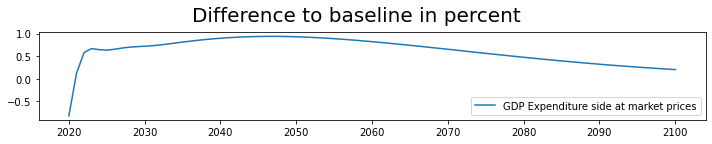

In [18]:
with mpak.set_smpl(2020,2100):
    mpak['PAKNYGDPMKTPKN'].difpctlevel.mul100.rename().plot(colrow=1,
                title='Difference to baseline in percent',top=0.8);

But first some basic information


### model['#ENDO'] 

Use '#ENDO' to access all endogenous variables in your model instance. 

For the sake of space, the result is saved in the variable 'allendo' and not printed. 

In [19]:
allendo = mpak['#ENDO']
# allendo.show

### Access values in .lastdf and .basedf

To limit the output printed, we set the time frame to 2020 to 2023. 

In [20]:
mpak.smpl(2020,2023);

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the latest simulation a small widget is displayed. 

In [21]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'] 

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the base dataframe, specify .base

In [22]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].base.df 

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.670160e+07,2.332304e+07
2021,2.720258e+07,2.383172e+07
2022,2.780126e+07,2.439406e+07
2023,2.849982e+07,2.501286e+07



### .df  Pandas dataframe 

Sometime you need to perform additional operations on the values. Therefor the .df will return a dataframe with the selected variables. 


In [23]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].df

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.648318e+07,2.268967e+07
2021,2.723559e+07,2.331771e+07
2022,2.796332e+07,2.394832e+07
2023,2.869072e+07,2.455519e+07



### .show  as a html table with tooltips 

If you want the variable descriptions use this 


In [24]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].show

### .names Variable names

If you select variables using wildcards, then you can access the names that correspond to your query.



In [25]:
mpak['PAKNYGDP??????'].names

['PAKNYGDPDISCCN',
 'PAKNYGDPDISCKN',
 'PAKNYGDPFCSTCN',
 'PAKNYGDPFCSTKN',
 'PAKNYGDPFCSTXN',
 'PAKNYGDPMKTPCD',
 'PAKNYGDPMKTPCN',
 'PAKNYGDPMKTPKD',
 'PAKNYGDPMKTPKN',
 'PAKNYGDPMKTPXN',
 'PAKNYGDPPOTLKN']

### .frml The formulas 

Use .frml to access all the equations for the endogenous variables.  

In [26]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].frml

PAKNYGDPMKTPKN : FRML <> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $
PAKNECONPRVTKN : FRML <Z,EXO> PAKNECONPRVTKN = (PAKNECONPRVTKN(-1)*EXP(-PAKNECONPRVTKN_A+ (-0.2*(LOG(PAKNECONPRVTKN(-1))-LOG((PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1)))+1*((LOG((PAKNYYWBTOTLCN*(1-PAKGGREVDRCTXN/100))/PAKNECONPRVTXN))-(LOG((PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1))))+0.0303228629698929+0.0163839011059956*DURING_2010-0.3*(PAKFMLBLPOLYXN/100-((LOG(PAKNECONPRVTXN))-(LOG(PAKNECONPRVTXN(-1)))))) )) * (1-PAKNECONPRVTKN_D)+ PAKNECONPRVTKN_X*PAKNECONPRVTKN_D $


### .rename() Rename variables to descriptions

Use .rename() to assign variable descriptions as variable names. 

Handy when plotting! 

In [27]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rename().df

,GDP Expenditure side at market prices,Household Consumption
2020,2.648318e+07,2.268967e+07
2021,2.723559e+07,2.331771e+07
2022,2.796332e+07,2.394832e+07
2023,2.869072e+07,2.455519e+07


### Transformations of solution results 

When the variables has been selected through the index operator a number of standard data transformations can be performed. 

|Transfomation|Meaning|expression 
| :--- | :--- | :----------------------------------------------: |
| pct |Growth rates| $\left(\cfrac{this_t}{this_{t-1}}-1\right )$                  |
| dif |Difference in level| $l-b$                                            |
| difpct| Differens in growth rate|$\left( \cfrac{l_t}{l_{t-1}}-1 \right) - \left(\cfrac{b_t}{b_{t-1}}-1 \right)$
| difpctlevel |differens in level in pct of baseline |$\left( \cfrac{l_t-b_t}{b_{t}} \right) $
| mul100 | multiply by 100 | $this_t \times 100$|

- $this$ is the chained value. Default lastdf but if preseeded by .base the values from .basedf will be used 
- $b$ is the values from .basedf
- $l$ is the values from .lastdf 

### .dif Difference in level 

The 'dif' command displays the difference in levels of the latest and previous solutions.

$l-b$

where l is the variable from the .lastdf and b is the variable from .basedf.  

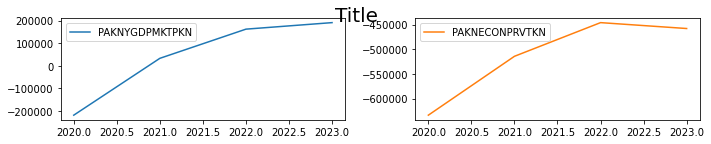

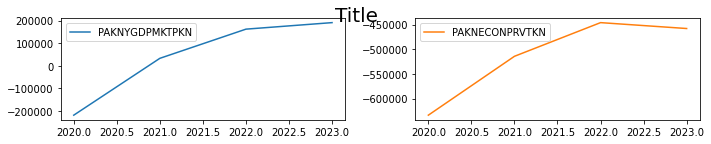

In [28]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dif.plot()

### .pct  Growthrates 
Display growth rates

$\left(\cfrac{l_t}{l_{t-1}}-1\right )$

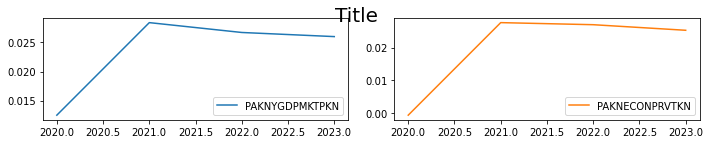

In [29]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.plot();

### .difpct property difference in growthrate 
The difference in the growth rates  between the last and base dataframe.  

$\left( \cfrac{l_t}{l_{t-1}}-1 \right) - \left(\cfrac{b_t}{b_{t-1}}-1 \right)$

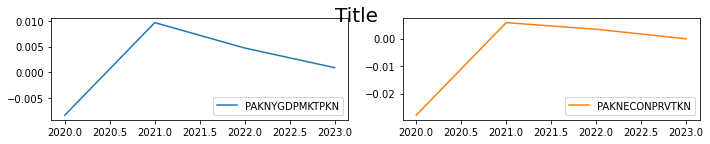

In [30]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.plot() ; 

### .difpctlevel percent difference of  levels 

$\left( \cfrac{l_t-b_t}{b_{t}} \right) $

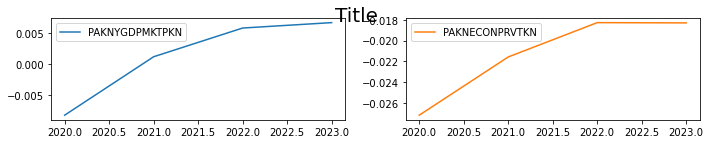

In [31]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.plot();  

### mul100 multiply by 100 

multiply growth rate by 100. 

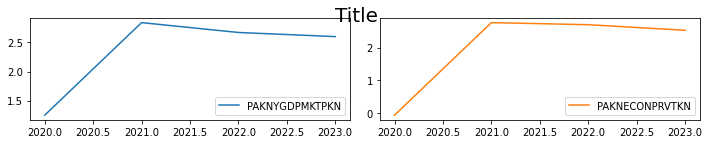

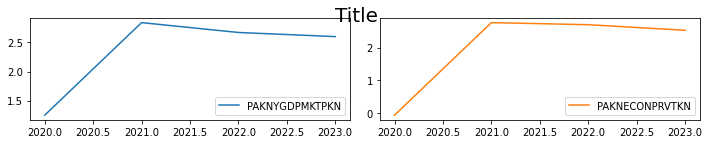

In [32]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.mul100.plot() 

## .plot chart the selected and transformed variables
After the varaibles has been selected and transformed, they can  be plotted. The .plot() method plots the selected variables separately

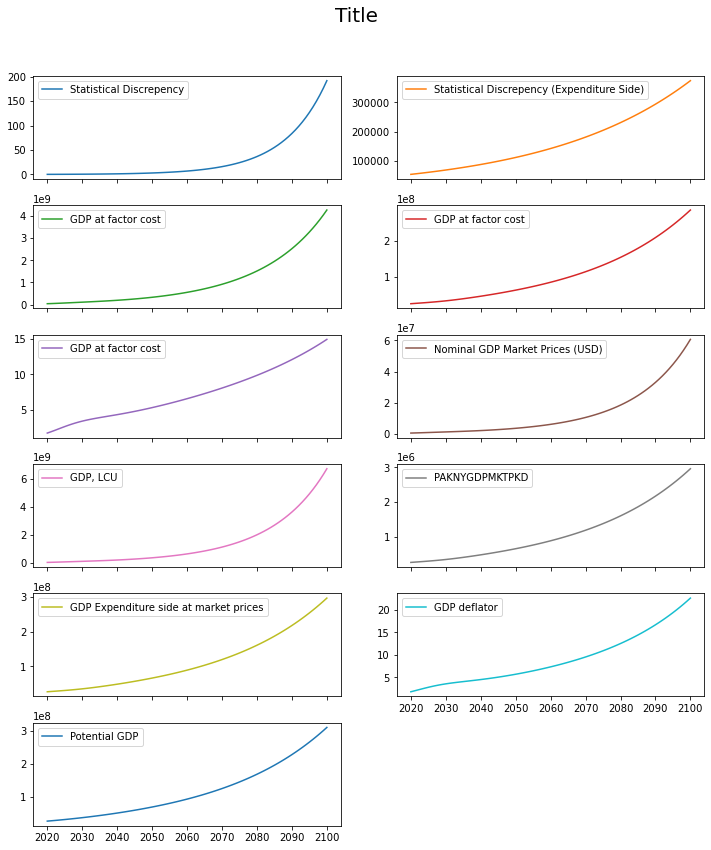

In [33]:
mpak.smpl(2020,2100);

mpak['PAKNYGDP??????'].rename().plot();

### Options to plot() 

Common:<br>
- title (optional): title. Defaults to ''.
- colrow (TYPE, optional): Columns per row . Defaults to 2.
- sharey (TYPE, optional): Share y axis between plots. Defaults to False.
- top (TYPE, optional): Relative position of the title. Defaults to 0.90.
        
        
More excotic:<br>         
- splitchar (TYPE, optional): If the name should be split . Defaults to '__'.
- savefig (TYPE, optional): Save figure. Defaults to ''.
- xsize  (TYPE, optional): x size default to 10 
- ysize  (TYPE, optional): y size per row, defaults to 2
- ppos (optional): # of position to use if split. Defaults to -1.
- kind (TYPE, optional): Matplotlib kind . Defaults to 'line'.


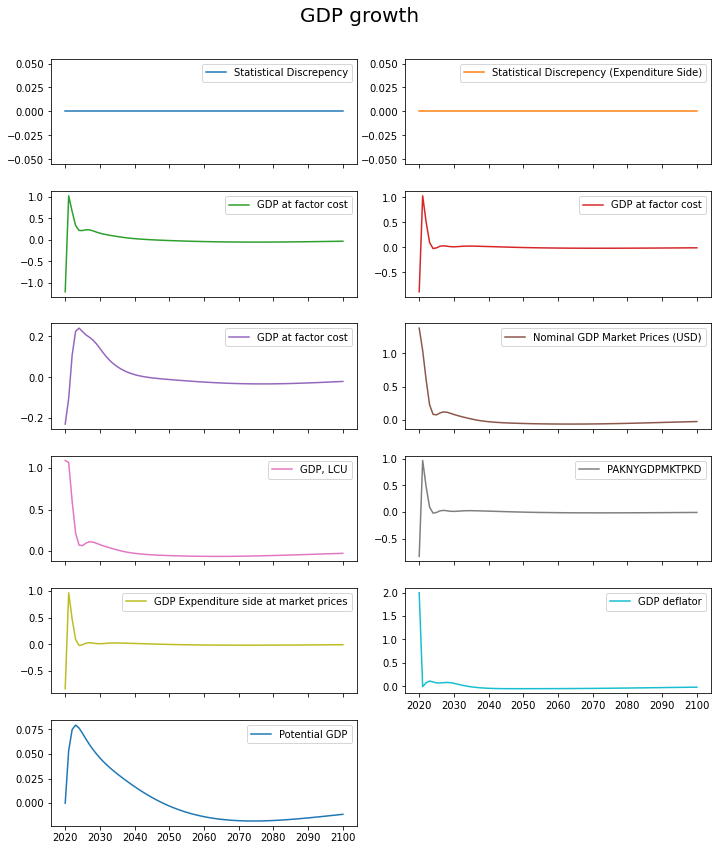

In [34]:
mpak['PAKNYGDP??????'].difpct.mul100.rename().plot(title='GDP growth ',top = 0.92);

## Plotting inspiration


The following graph shows the components of GDP using the values of the baseline dataframe. 

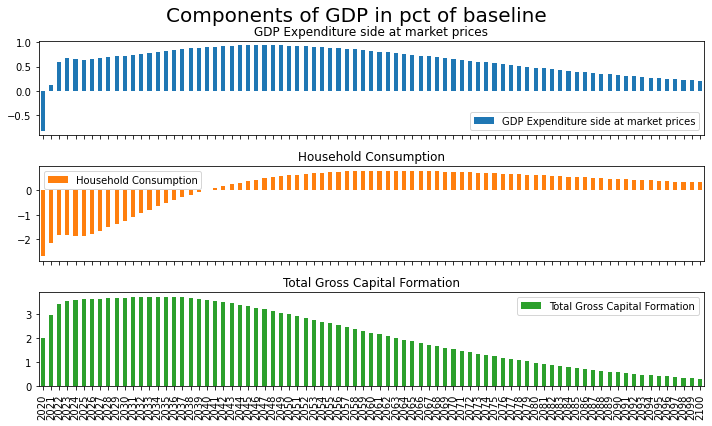

In [35]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN'].\
difpctlevel.mul100.rename().\
plot(title='Components of GDP in pct of baseline',colrow=1,top=0.90,kind='bar') ;


###  Heatmaps

For some model types heatmaps can be helpful, and they come out of the box. This feature was developed for use by bank stress test models. 

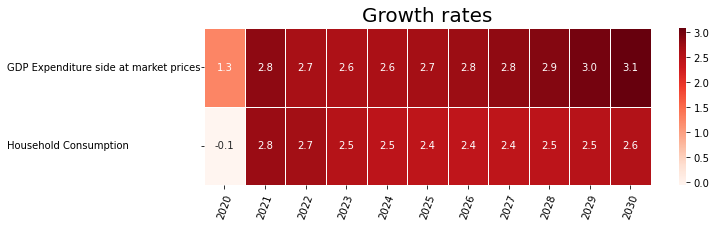

In [36]:
with mpak.set_smpl(2020,2030):
    heatmap = mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.rename().mul100.heat(title='Growth rates',annot=True,dec=1,size=(10,3))  


<a id=’With’></a>
### Violin, swarm and boxplots, 
Not obvious for macro models, but useful for stress test  models with many banks. 

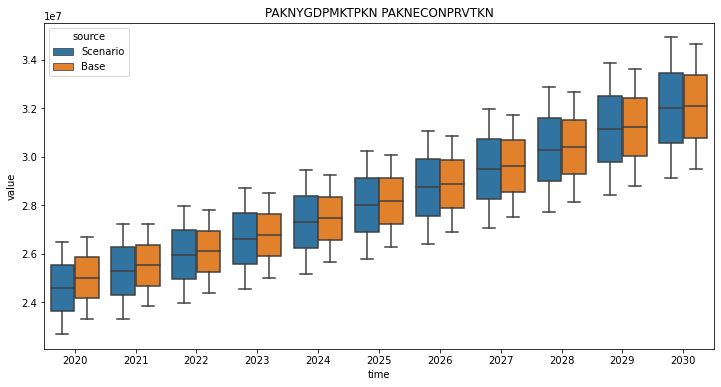

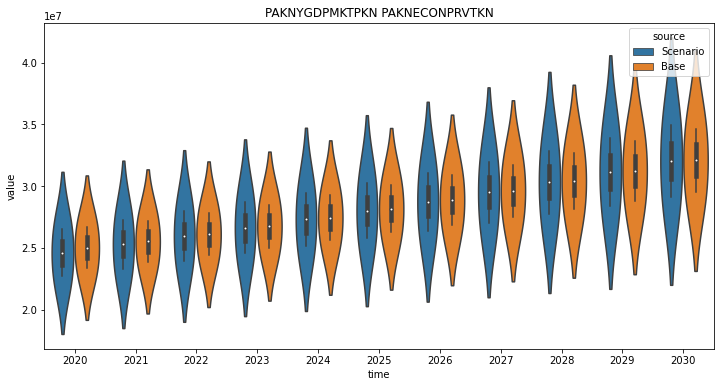

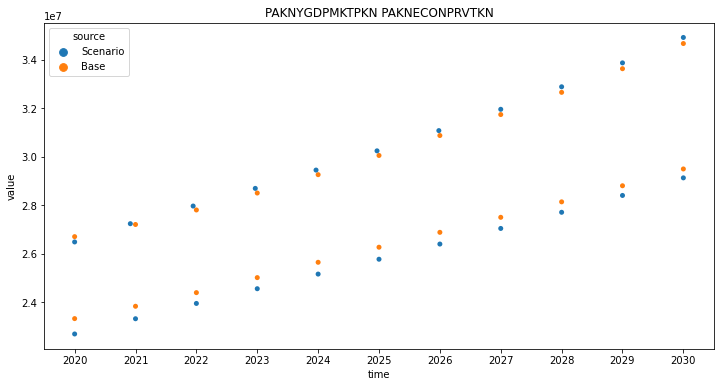

In [37]:
with mpak.set_smpl(2020,2030): 
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.box()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.violin()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.swarm()  

### Plot baseline vs alternative
A raw routine, only showing levels.
To make it really useful it should be expanded. 

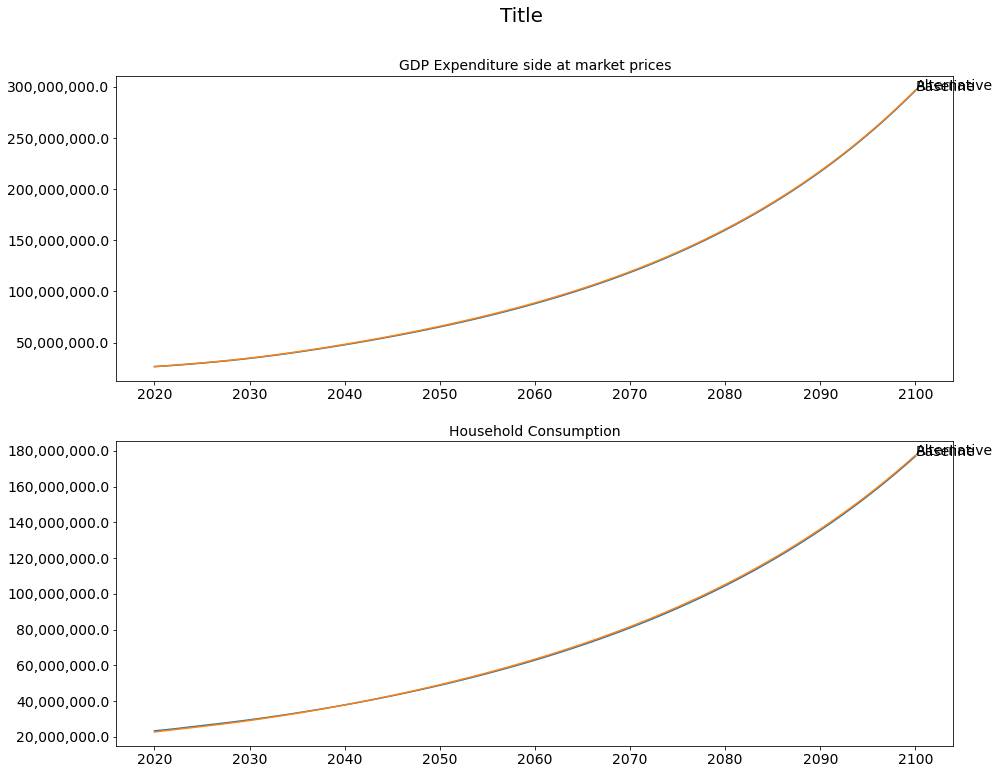

In [38]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].plot_alt() ;


## .draw() Graphical presentation of relationships between variables

.draw() helps you understand the relationship between variables in your model better. 
 
The thickness the arrow reflect the attribution of the the upstream variable to the impact on the downstream variable. 

### .draw(up = level, down = level)


You can specify how many levels up and down you want in your graphical presentation (Needs more explanation).

In this example all variables that depend directly upon GDP and consumption as well as those that are determined by them, are displayed. This means one step upstream in the model logic and one step downstream. 

More on the how to visualize the logic structure [here](../howto/structure/Logical_structure.ipynb) 

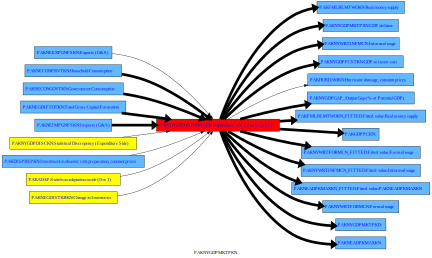

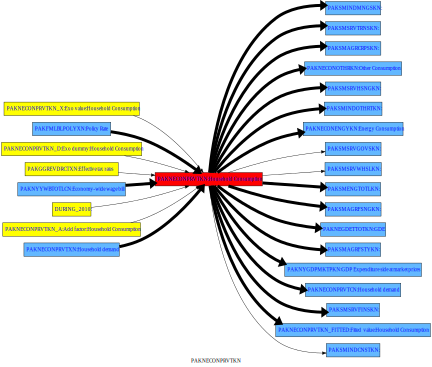

In [39]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1)  # diagram of all direct dependencies 

### .draw(filter =\<minimal impact>)

By specifying filter=  only links where the minimal impact is more than \<minimal impact> are show. In this case 20% 


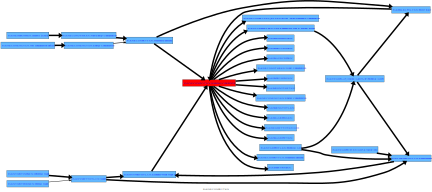

In [40]:
mpak['PAKNECONPRVTKN'].draw(up=3,down=1,filter=20)  



## dekomp() Attrribution of right hand side variables to change in result. 
For more information on attribution look [here](../howto/attribution/Attribution%20background.ipynb)

The dekomp command decomposes the contributions of the right hand side variables to the observed change in the left hand side variables. 

In [41]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dekomp()  # frml attribution 


Formula        : FRML  <> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                       2021        2022        2023        2024        2025
Variable    lag                                                            
Base        0   27202580.71 27801259.41 28499818.71 29256735.74 30047560.47
Alternative 0   27235594.33 27963320.85 28690715.67 29445700.39 30238498.05
Difference  0      33013.62   162061.44   190896.96   188964.65   190937.58
Percent     0          0.12        0.58        0.67        0.65        0.64

 Contributions to differende for  PAKNYGDPMKTPKN
                         2021       2022       2023       2024       2025
Variable       lag                                                       
PAKNECONPRVTKN 0   -514010.77 -445732.98 -457677.02 -485936.67 -495257.60
PAKNECONGOVTKN 0    275618.47  268128.64  252327.22  239826.74  231709.68
PAKNEGDIFTOTKN 0    1207

## Bespoken plots using matplotlib  (or plotly -later) (should go to a separate plot book 

The predefined plots are not necessary created for presentation purpose. To create  bespoken plots the they can be 
constructed directly in python scripts. The two main libraries are matplotlib, plotly but any ther python plotting library can be used. Here is an example using matplotlib. 

## Plot four separate plots of multiple series in grid

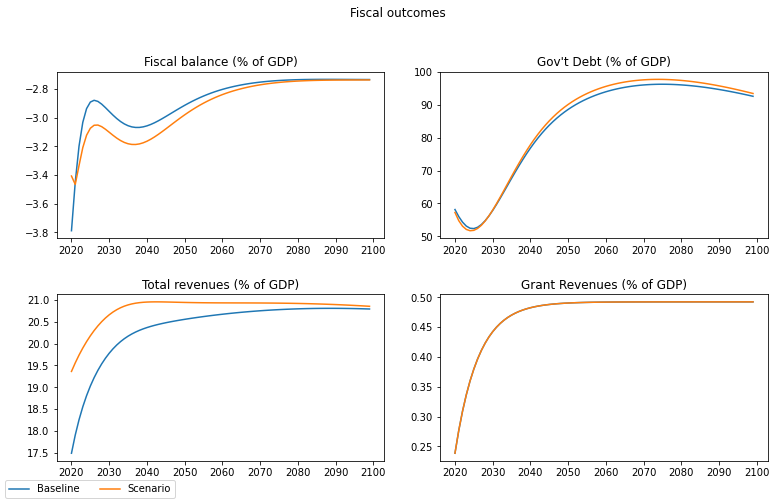

In [42]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
